In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, '$x$')

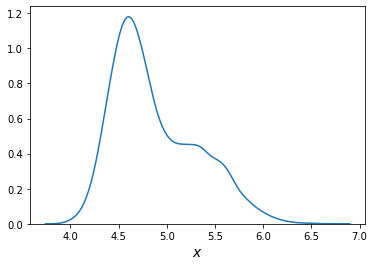

In [ ]:
clusters = 2
n_cluster = [4000, 6000]
n_total = sum(n_cluster)
means = [5.3, 4.6]
std_devs = [0.35, 0.2]
mix = np.random.normal(np.repeat(means, n_cluster), np.repeat(std_devs, n_cluster))
sns.kdeplot(np.array(mix))
plt.xlabel('$x$', fontsize=14)

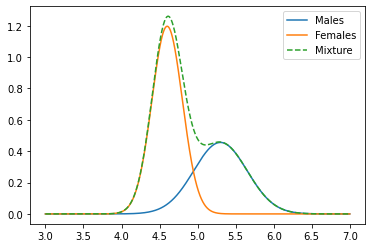

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# define your distributions
d1 = stats.norm(5.3, 0.35)
d2 = stats.norm(4.6, 0.2)

# set mixture component weights
mc = [4000, 6000]
mc = mc / np.sum(mc) # ensuring they sum to 1

# where to evaluate the densities
x = np.linspace(3, 7, 10000)
# calculate density and apply mixture weights
c1 = d1.pdf(x) * mc[0]
c2 = d2.pdf(x) * mc[1]

# plot everything
plt.plot(x, c1, label='Males')
plt.plot(x, c2, label='Females')
plt.plot(x, c1 + c2, '--', label='Mixture')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('aliens.csv', header=None)
df.columns = ['height', 'weight']
df.head()

,height,weight
0,1.908,79.651
1,1.916,80.814
2,1.891,79.011
3,1.888,82.734
4,1.910,80.039


In [ ]:
from sklearn.mixture import GaussianMixture 

for i in range(2,8):
    gmm = GaussianMixture(n_components = i) 
    gmm.fit(df)
    bic = gmm.bic(df)
    print(f" Number of races: {i}, BIC:  {bic}")

 Number of races: 2, BIC:  22276.67745394193
 Number of races: 3, BIC:  17744.293016330328
 Number of races: 4, BIC:  14205.854816522755
 Number of races: 5, BIC:  10916.181186708924
 Number of races: 6, BIC:  10973.805770950898
 Number of races: 7, BIC:  11020.35358765929


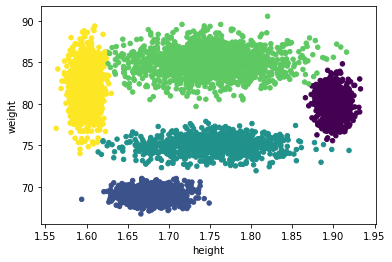

In [ ]:
gmm = GaussianMixture(n_components = 5, random_state=13) 
gmm.fit(df)
df['race'] = gmm.predict(df)
ax1 = df.plot.scatter(x='height', y='weight', c=df['race'], cmap='viridis', colorbar=False)


In [ ]:
df['race'].nunique()

5